# Basic use of BooN
We illustrate by examples the main methods of BooN.

In [36]:

import matplotlib.pyplot as plt
import networkx as nx
from sympy.abc import w, x, y, z, v
from tabulate import tabulate
from boon import *
from boon.logic import *

## Definition of a Boolean Network
Show the Boolean network in different output formats.

In [37]:
# Define the initial Boolean network
boon = BooN({x: y, y: x & z, z: w | ~x & v | y, w: x & y | ~x & z & ~w & ~v, v: ~v & w})

In [38]:
# Get the variables
print("Variables of BooN: ", boon.variables)

Variables of BooN:  {z, y, v, x, w}


In [39]:
# Show BooN with different styles.
print("- SHOW NETWORK -")
print("Logical")
print(boon)

- SHOW NETWORK -
Logical
z = w ∨ y ∨ (v ∧ ¬x)
y = x ∧ z
v = w ∧ ¬v
x = y
w = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬w ∧ ¬x)


In [40]:
print("Sympy")
boon.style = SYMPY
print(boon)

Sympy
z = w | y | (v & ~x)
y = x & z
v = w & ~v
x = y
w = (x & y) | (z & ~v & ~w & ~x)


In [41]:
print("Mathematica")
boon.style = MATHEMATICA
print(boon)

Mathematica
z = w || y || (v && !x)
y = x && z
v = w && !v
x = y
w = (x && y) || (z && !v && !w && !x)


In [42]:
# Default style is LOGICAL
boon.style = LOGICAL

## Basic Operations on variables

In [43]:
# Delete variable v.
print("- DELETE v -")
boon.delete(v)
print(boon)

- DELETE v -
z = w ∨ y ∨ ¬x
w = (x ∧ y) ∨ (z ∧ ¬w ∧ ¬x)
y = x ∧ z
x = y


In [44]:
# Rename variable w to v.
print("- RENAME w to v -")
boon.rename(w, v)
print(boon)

- RENAME w to v -
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y


## Analysis of the Dynamics

In [45]:
# compute the stable states
print("- STABLE STATES -")
stable = boon.stable_states
print(tabulate(stable, headers='keys', tablefmt='dpsl'))

print("\nStability constraints in logic:", prettyform(boon.stability_constraints()))

- STABLE STATES -
z     v     y     x
----  ----  ----  ----
True  True  True  True

Stability constraints in logic: (x ⇔ y) ∧ (y ⇔ (x ∧ z)) ∧ (z ⇔ (v ∨ y ∨ ¬x)) ∧ (v ⇔ ((x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)))


- MODEL ASYNCHRONOUS-


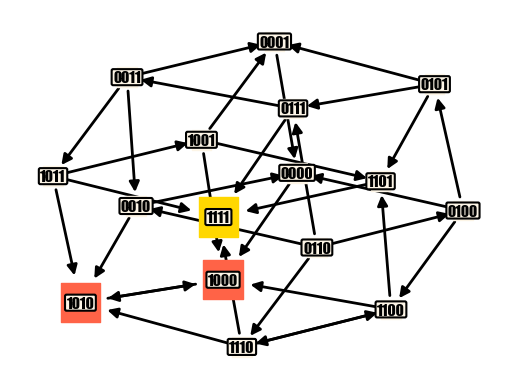

In [46]:
# initialize figures
_, ax2 = plt.subplots()
# Define the datamodel of dynamics
print("- MODEL ASYNCHRONOUS-")
M = boon.model()
ax2.axis('off')
boon.draw_model(M, pos=hypercube_layout(4), ax=ax2)

- MODEL SYNCHRONOUS-


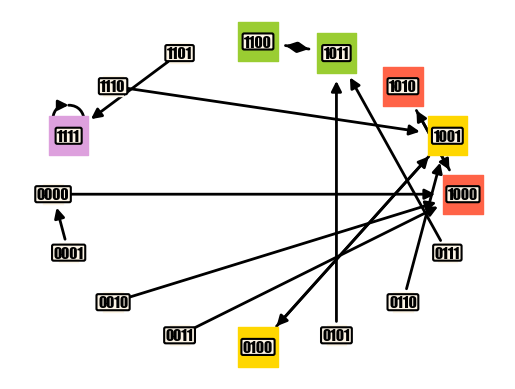

In [47]:
# Synchronous datamodel
print("- MODEL SYNCHRONOUS-")
MS = boon.model(mode=synchronous, self_loop=True)
_, ax3 = plt.subplots()
ax3.axis('off')
boon.draw_model(MS, pos=nx.shell_layout(MS), ax=ax3)

In [48]:
print("- EQUILIBRIA -")
eqs = boon.equilibria(model=MS)
for eq in eqs:
    print(tabulate(eq, headers='keys'))

- EQUILIBRIA -
z     y      v      x
----  -----  -----  -----
True  False  False  False
True  False  True   False
z      y      v      x
-----  -----  -----  -----
True   False  False  True
False  True   False  False
z     y      v      x
----  -----  -----  -----
True  False  True   True
True  True   False  False
z     y     v     x
----  ----  ----  ----
True  True  True  True


## Interaction Graph

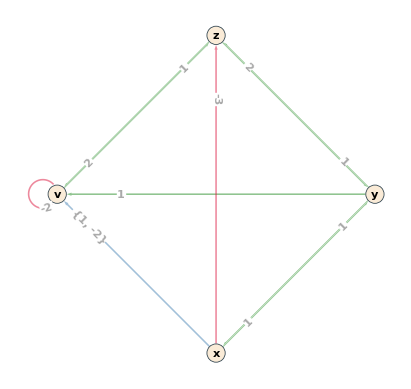

In [49]:
# Build the interaction graph
IG = boon.interaction_graph

boon.pos = nx.circular_layout(IG)
_, ax1 = plt.subplots()
ax1.axis('off')
boon.draw_IG(IG, modular=True, ax=ax1)

In [50]:
# retrieve BooN from the interaction graph
print("- FROM INTERACTION GRAPH -")
boon2= BooN.from_ig(IG)
print(boon2)

- FROM INTERACTION GRAPH -
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y


## Load and Save

In [51]:
# save and re-load in a new BooN boon2
print("SAVE and LOAD")
boon.save("bn") 
print("BooN saved in bn.boon - next re loaded.")

boon2 = BooN.load("bn") # load is a static method of BooN
print(boon2)

SAVE and LOAD
BooN saved in bn.boon - next re loaded.
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y


export and import from BoolNet file

In [52]:
print("- EXPORT & IMPORT -")
boon2.to_textfile('bn')
print("BooN exported as Bool Net format in bn.bnet - next imported. ")
boon2 = BooN.from_textfile('bn.bnet')  
print(boon2)

- EXPORT & IMPORT -
BooN exported as Bool Net format in bn.bnet - next imported. 
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y


## Normal form Conversion
Conversion of the formulas to CNF and DNF form.

In [53]:
# Convert the formula to CNF
print("- CNF Conversion -")
boon2.cnf()
print(boon2)

- CNF Conversion -
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∨ z) ∧ (x ∨ ¬v) ∧ (y ∨ ¬x)
x = y


In [54]:
# Convert the formula do DNF
print(" - DNF conversion -")
boon2.dnf()
print(boon2)

 - DNF conversion -
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y


## Random Graph Generation
Generate a random graph where the formulas are in DNF. The generation depends on the class of topology of the interaction graph. 3 classes are available: 'Erdos-Reny', 'Small-World', and 'Scale-Free'.
By default the Erdos-Reny class is selected.
The other parameters are the number of nodes, a probability related to interaction between variables,
the probability to get a positive term, the minimal and maximal number of clauses and the prefix of the variables (default 'x').

In [55]:
# Number of nodes.
n = 20

### Erdös Reny

In [56]:
boonrand = BooN.random(n, p_link=0.25, p_pos=0.6, topology='Erdos-Reny')
boonrand.pos = nx.circular_layout(boonrand.interaction_graph)
print(boonrand)

x11 = x6 ∨ x8 ∨ ¬x2 ∨ ¬x3
x19 = ¬x17
x6 = x19 ∨ ¬x18 ∨ ¬x2
x0 = x4
x1 = true
x3 = x5
x18 = true
x14 = x10 ∨ ¬x11
x17 = x3 ∨ ¬x9
x12 = x2
x5 = x6 ∨ ¬x2
x8 = x0 ∨ x14
x7 = x4 ∨ x5 ∨ ¬x6 ∨ (x3 ∧ ¬x16)
x4 = x16 ∨ ¬x15
x2 = x1 ∨ x10 ∨ x12 ∨ x7
x10 = x7 ∨ ¬x0 ∨ (x17 ∧ ¬x18)
x16 = true
x13 = x18 ∧ ¬x17
x15 = x12 ∨ ¬x11
x9 = x15 ∧ x6


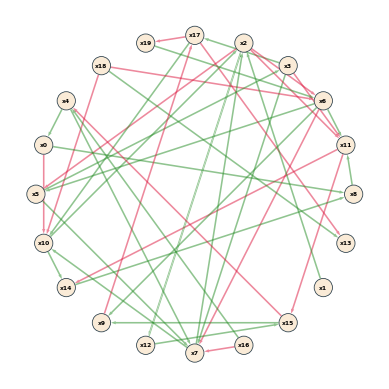

In [57]:
boonrand.draw_IG()

### Small World 

In [58]:
boonrand = BooN.random(n, p_link=1.0, p_pos=0.6, topology='Small-World')
boonrand.pos = nx.circular_layout(boonrand.interaction_graph)
print(boonrand)

x11 = (x7 ∧ ¬x10) ∨ (x9 ∧ ¬x7)
x19 = x0 ∨ x15
x6 = true
x0 = (x1 ∧ x18) ∨ (¬x14 ∧ ¬x18)
x1 = (x17 ∧ x4) ∨ (¬x4 ∧ ¬x7)
x18 = ¬x19
x3 = ¬x1 ∧ ¬x2
x14 = ¬x13 ∧ (x12 ∨ ¬x11)
x17 = true
x12 = x2
x5 = x14
x8 = (x7 ∨ ¬x15) ∧ (x9 ∨ ¬x7) ∧ (¬x10 ∨ ¬x7)
x7 = false
x4 = ¬x13
x2 = x1 ∨ ¬x4
x10 = x14
x16 = (x13 ∧ x15) ∨ (x13 ∧ ¬x17) ∨ (¬x14 ∧ ¬x17)
x13 = ¬x0
x15 = ¬x11 ∨ ¬x12 ∨ (x13 ∧ ¬x14) ∨ (x13 ∧ ¬x3)
x9 = (x10 ∧ x5) ∨ (x0 ∧ ¬x10) ∨ (x10 ∧ ¬x6)


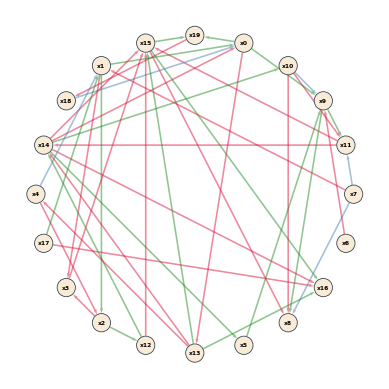

In [59]:
boonrand.draw_IG()

### Scale Free

In [60]:
boonrand = BooN.random(n, p_link=0.1, p_pos=0.6, topology='Scale-Free')
boonrand.pos = nx.circular_layout(boonrand.interaction_graph)
print(boonrand)

x11 = false
x19 = true
x6 = true
x0 = x0 ∨ x1
x1 = (x14 ∨ ¬x18) ∧ (x8 ∨ ¬x18) ∧ (x0 ∨ x14 ∨ x2) ∧ (x0 ∨ x2 ∨ x8) ∧ (¬x1 ∨ ¬x18) ∧ (x0 ∨ x2 ∨ ¬x1)
x3 = true
x18 = false
x14 = false
x17 = x0
x12 = x0
x5 = false
x8 = false
x7 = false
x4 = x0
x2 = true
x10 = true
x16 = ¬x0
x13 = true
x15 = false
x9 = true


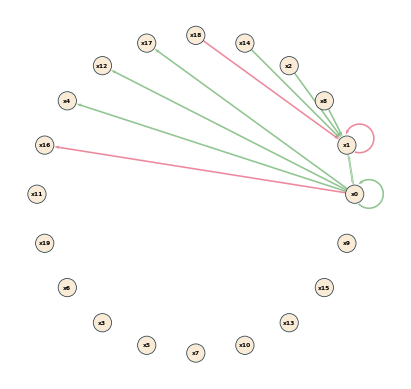

In [61]:
boonrand.draw_IG()